Fetching the MNIST dataset...
Visualizing some random digits...


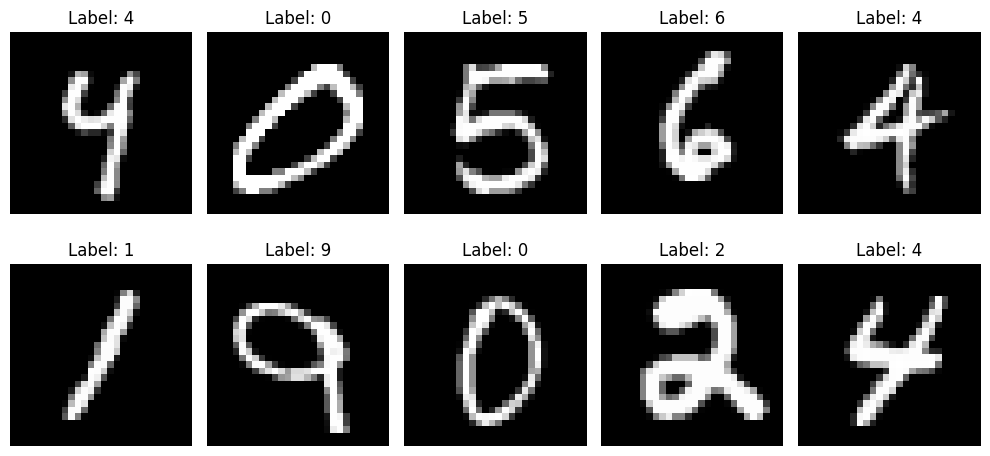

Splitting the dataset into train and test sets...
Training the Random Forest Classifier...
Making predictions on the test set...
Evaluating the model...
Accuracy: 96.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Confusion Matrix:
[[1325    0    4    0    1  

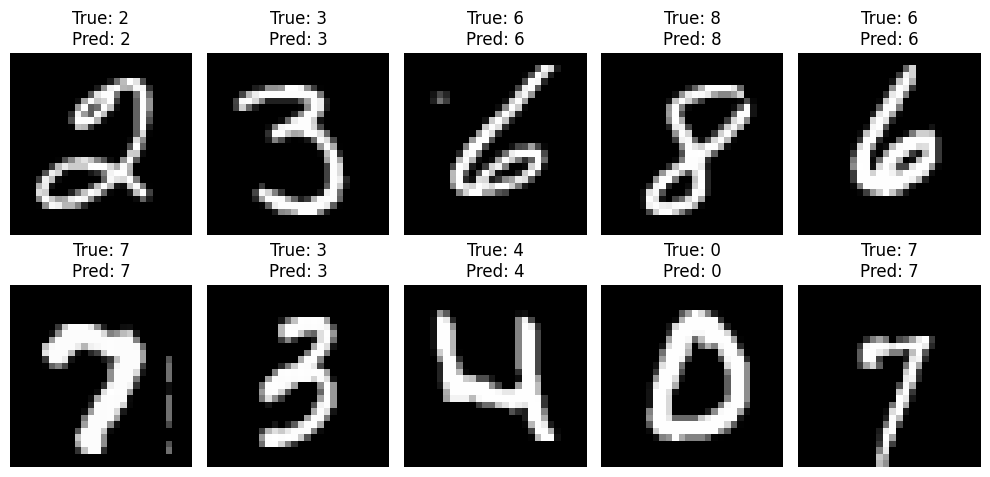

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the MNIST Dataset
print("Fetching the MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False) 
X, y = mnist.data, mnist.target

# Convert target to integers
y = y.astype(int)

# Visualize Random Handwritten Digits
print("Visualizing some random digits...")
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(0, len(X))
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# Train-Test Split
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
print("Training the Random Forest Classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Make Predictions
print("Making predictions on the test set...")
y_pred = rf_clf.predict(X_test)

# Evaluate the Model
print("Evaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize Some Predictions
print("Visualizing some predictions...")
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(0, len(X_test))
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


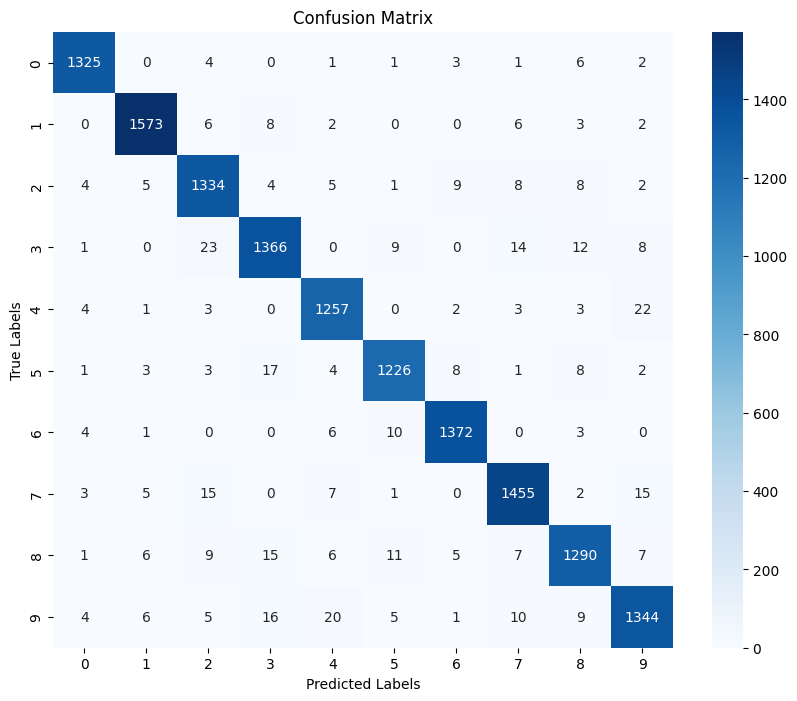


Analyzing Misclassifications...
Total Samples: 14000
Correct Predictions: 13542
Incorrect Predictions: 458
Accuracy (from Confusion Matrix): 96.73%
Most Confused Digits: (3, 2)
Count of Most Confused Predictions: 23


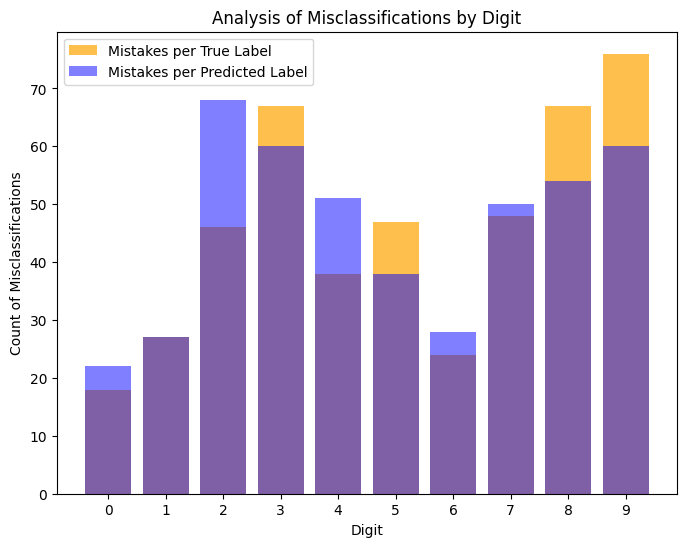

In [3]:
import seaborn as sns  # heatmap visualization

# Visualize the Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Analyze Misclassifications
print("\nAnalyzing Misclassifications...")
total_samples = conf_matrix.sum()
correct_predictions = np.trace(conf_matrix)
incorrect_predictions = total_samples - correct_predictions

print(f"Total Samples: {total_samples}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")
print(f"Accuracy (from Confusion Matrix): {correct_predictions / total_samples * 100:.2f}%")

# Identify the Most Confused Digits
misclassifications = conf_matrix - np.diag(np.diag(conf_matrix))  # Zero out the diagonal (correct predictions)
most_confused = np.unravel_index(np.argmax(misclassifications), misclassifications.shape)
print(f"Most Confused Digits: {most_confused}")
print(f"Count of Most Confused Predictions: {misclassifications[most_confused]}")

plt.figure(figsize=(8, 6))
plt.bar(range(10), np.sum(misclassifications, axis=1), color='orange', alpha=0.7, label='Mistakes per True Label')
plt.bar(range(10), np.sum(misclassifications, axis=0), color='blue', alpha=0.5, label='Mistakes per Predicted Label')
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count of Misclassifications")
plt.title("Analysis of Misclassifications by Digit")
plt.legend()
plt.show()
